In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, classification_report, \
                            confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('Loan.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
# Age : Customer's age in completed years
# Experience : years of professional experience
# Income : Annual income of the customer ($000)
# Family : Family size of the customer
# CCAvg : Avg. spending on credit cards per month ($000)
# Education : Education Level.
# 1: Undergrad;
# 2: Graduate;
# 3: Advanced/Professional
# Mortgage : Value of house mortgage if any. ($000)
# Personal Loan : Did this customer accept the personal loan offered in the last campaign?
# Securities Account : Does the customer have a securities account with the bank?
# CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
# Online : Does the customer use internet banking facilities?
# Credit card : Does the customer use a credit card issued by

In [4]:
# Checking missing values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# Drop not informative feature
df.drop(['ZIP Code', 'ID'], axis=1, inplace=True)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [6]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


<AxesSubplot:>

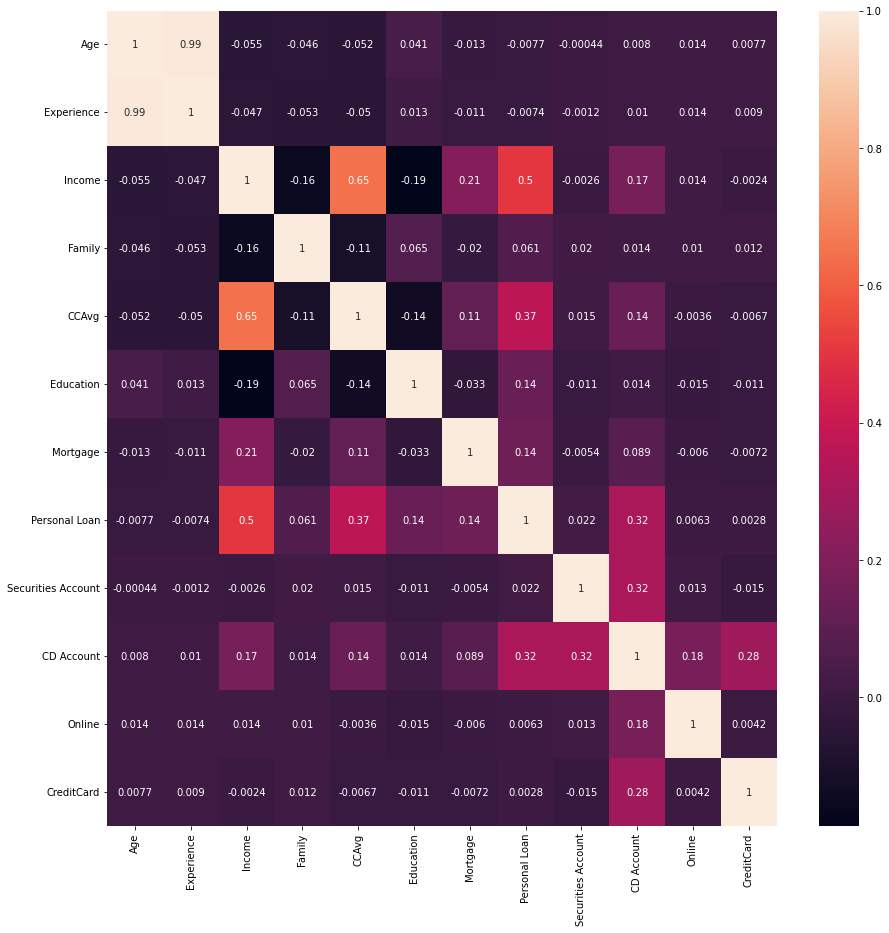

In [7]:
correlation_matrix = df.corr()

plt.subplots(figsize=(15, 15))
sns.heatmap(data=correlation_matrix, annot=True)

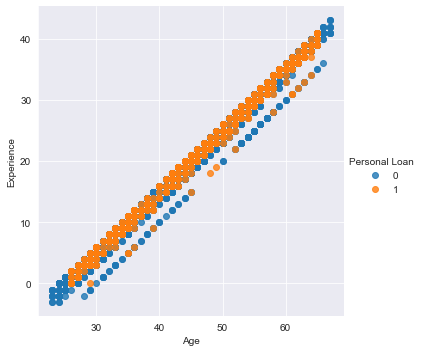

In [8]:
sns.set_style("darkgrid")
ax = sns.lmplot(x='Age', y='Experience', data=df, hue='Personal Loan', fit_reg=False)
ax.set_xlabels('Age')
ax.set_ylabels('Experience')

In [9]:
# Correlation between Age and Experience features is 0.99, let's drop Experience
df.drop(['Experience'], axis=1, inplace=True)
df

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [10]:
df['Education'].replace(1, 'Undergrad', regex=True, inplace=True)
df['Education'].replace(2, 'Graduate', regex=True, inplace=True)
df['Education'].replace(3, 'Advanced/Professional', regex=True, inplace=True)
df

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,45,4,1.0,Graduate,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,Advanced/Professional,0,0,0,0,1,0
4996,30,15,4,0.4,Undergrad,85,0,0,0,1,0
4997,63,24,2,0.3,Advanced/Professional,0,0,0,0,0,0
4998,65,49,3,0.5,Graduate,0,0,0,0,1,0


In [11]:
df = pd.get_dummies(data=df, columns=['Education'], drop_first=True)
df

,Age,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Undergrad
0,25,49,4,1.6,0,0,1,0,0,0,0,1
1,45,34,3,1.5,0,0,1,0,0,0,0,1
2,39,11,1,1.0,0,0,0,0,0,0,0,1
3,35,100,1,2.7,0,0,0,0,0,0,1,0
4,35,45,4,1.0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,0,0,0,0,1,0,0,0
4996,30,15,4,0.4,85,0,0,0,1,0,0,1
4997,63,24,2,0.3,0,0,0,0,0,0,0,0
4998,65,49,3,0.5,0,0,0,0,1,0,1,0


In [12]:
target = 'Personal Loan'

<AxesSubplot:>

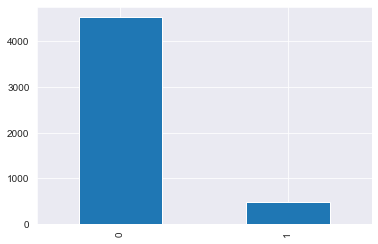

In [13]:
df[target].value_counts().plot(kind='bar')

In [14]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Random Forest

In [15]:
clf_rf = RandomForestClassifier(random_state=42)

In [16]:
rf_params = {'criterion': ['gini', 'entropy'],
             'n_estimators':[10, 50, 100],
             'max_features': [2, 5, 7, 10],
             'min_samples_split': range(2, 11, 2),
             'min_samples_leaf': range(2, 11, 2),
             'max_depth': range(2, 11, 2)}

In [17]:
%%time

rf_grid_search_cv = GridSearchCV(clf_rf, rf_params, cv=5, n_jobs=-1, scoring='balanced_accuracy')
rf_grid_search_cv.fit(X_train, y_train)

Wall time: 5min 13s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11, 2),
                         'max_features': [2, 5, 7, 10],
                         'min_samples_leaf': range(2, 11, 2),
                         'min_samples_split': range(2, 11, 2),
                         'n_estimators': [10, 50, 100]},
             scoring='balanced_accuracy')

In [18]:
rf_grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 10}

In [19]:
best_rf_clf = rf_grid_search_cv.best_estimator_

rf_pred_test = best_rf_clf.predict(X_test)

In [20]:
print(classification_report(y_test, rf_pred_test))
print('F1_score : ', f1_score(y_test, rf_pred_test))
print('Precision: ', precision_score(y_test, rf_pred_test))
print('Recall : ', recall_score(y_test, rf_pred_test))
print('Balanced accuracy : ', balanced_accuracy_score(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1356
           1       0.96      0.94      0.95       144

    accuracy                           0.99      1500
   macro avg       0.98      0.97      0.97      1500
weighted avg       0.99      0.99      0.99      1500

F1_score :  0.9543859649122808
Precision:  0.9645390070921985
Recall :  0.9444444444444444
Balanced accuracy :  0.970378564405113


### Gradient Boosting

In [21]:
clf_gb = GradientBoostingClassifier(random_state=42)

In [22]:
gb_params = {'learning_rate':[0.001, 0.01, 0.05, 0.1],
             'criterion': ['friedman_mse', 'squared_error', 'mse'],
             'n_estimators':[10, 50, 100],
             'max_depth': range(2, 11, 2),
             'min_samples_split': range(2, 11, 2)}

In [23]:
%%time

gb_grid_search_cv = GridSearchCV(clf_gb, gb_params, cv=5, n_jobs=-1, scoring='balanced_accuracy')
gb_grid_search_cv.fit(X_train, y_train)

C:\Users\Amir\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.81079436
 0.5        0.5        0.81079436 0.5        0.5        0.81079436
 0.5

Wall time: 1min 47s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': range(2, 11, 2),
                         'min_samples_split': range(2, 11, 2),
                         'n_estimators': [10, 50, 100]},
             scoring='balanced_accuracy')

In [26]:
gb_grid_search_cv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [27]:
best_gb_clf = gb_grid_search_cv.best_estimator_

gb_pred_test = best_gb_clf.predict(X_test)

In [28]:
print(classification_report(y_test, gb_pred_test))
print('F1_score : ', f1_score(y_test, gb_pred_test))
print('Precision: ', precision_score(y_test, gb_pred_test))
print('Recall : ', recall_score(y_test, gb_pred_test))
print('Balanced accuracy : ', balanced_accuracy_score(y_test, gb_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1356
           1       0.96      0.95      0.95       144

    accuracy                           0.99      1500
   macro avg       0.98      0.97      0.97      1500
weighted avg       0.99      0.99      0.99      1500

F1_score :  0.9547038327526133
Precision:  0.958041958041958
Recall :  0.9513888888888888
Balanced accuracy :  0.9734820550639134


In [29]:
cnf_matrix = confusion_matrix(y_test, gb_pred_test)

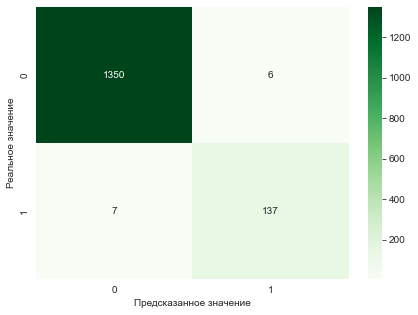

In [30]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cnf_matrix, annot=True, cmap='Greens', fmt='g')
plt.ylabel('Реальное значение')
plt.xlabel('Предсказанное значение')
plt.show()